In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
from matplotlib.axes import Axes
import xesmf as xe
from scipy.interpolate import RegularGridInterpolator
from scipy import interpolate

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [37]:
data_dir = 'surface_restart.nc'
ds_surface_restart = xr.open_dataset(data_dir)

data_dir = 'sfc_ini_red.nc'
ds_sfc_ini_red = xr.open_dataset(data_dir)

data_dir = 'sfc_ini.nc'
ds_sfc_ini = xr.open_dataset(data_dir)

In [3]:
ds_surface_restart

<xarray.Dataset>
Dimensions:   (lat: 94, lev: 4, lon: 192)
Dimensions without coordinates: lat, lev, lon
Data variables:
    sheleg    (lat, lon) float64 ...
    snwdph    (lat, lon) float64 ...
    tskin     (lat, lon) float64 ...
    smc       (lev, lat, lon) float64 ...
    stc       (lev, lat, lon) float64 ...
    slc       (lev, lat, lon) float64 ...
    canopy    (lat, lon) float64 ...
    trans     (lat, lon) float64 ...
    sncovr    (lat, lon) float64 ...
    zorl_o    (lat, lon) float64 ...
    hice      (lat, lon) float64 ...
    hsnow     (lat, lon) float64 ...
    fwater    (lat, lon) float64 ...
    fice      (lat, lon) float64 ...
    tice_r    (lat, lon) float64 ...
    tice      (lat, lon) float64 ...
    twater_r  (lat, lon) float64 ...
    twater    (lat, lon) float64 ...

In [4]:
ds_sfc_ini_red

<xarray.Dataset>
Dimensions:  (Time: 1, xaxis_1: 192, yaxis_1: 94, zaxis_1: 1, zaxis_2: 4)
Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0 4.0 5.0 ... 189.0 190.0 191.0 192.0
  * yaxis_1  (yaxis_1) float64 1.0 2.0 3.0 4.0 5.0 ... 90.0 91.0 92.0 93.0 94.0
  * zaxis_1  (zaxis_1) float64 1.0
  * zaxis_2  (zaxis_2) float64 1.0 2.0 3.0 4.0
  * Time     (Time) float64 1.0
Data variables:
    slmsk    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    orog     (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    tsea     (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    sheleg   (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    tg3      (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    zorl     (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alvsf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alvwf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alnsf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alnwf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    vfrac    (Tim

# 1. Sheleg - Snow depth in metres

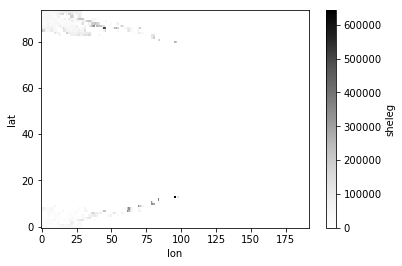

In [9]:
ds_surface_restart.sheleg.plot(cmap='Greys')

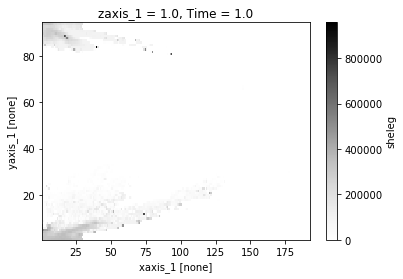

In [14]:
ds_sfc_ini_red_sheleg_ = ds_sfc_ini_red.sheleg*1000
ds_sfc_ini_red_sheleg_.plot(cmap='Greys')

Hence the sheleg values going in the model have to be multiplied with 1000

# 2. Snwdph - actual snow depth (mm) over land/sea ice

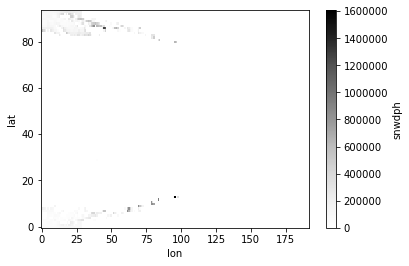

In [15]:
ds_surface_restart.snwdph.plot(cmap='Greys')

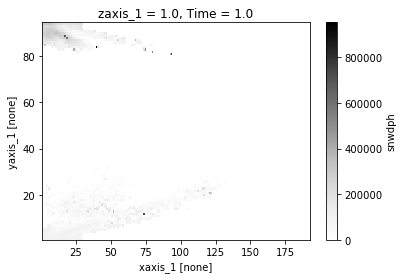

In [18]:
ds_sfc_ini_red_snwdph_ = ds_sfc_ini_red.snwdph*100
ds_sfc_ini_red_snwdph_.plot(cmap='Greys')

# 3. Tskin ground surface skin temperature

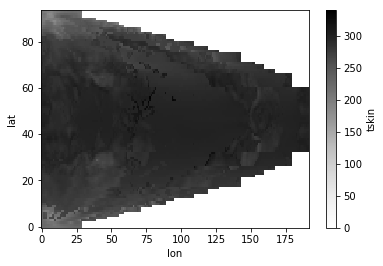

In [24]:
ds_surface_restart.tskin.plot(cmap='Greys')

In [25]:
# To do tskin

# 4. smc - soil volumetric water content (fraction)

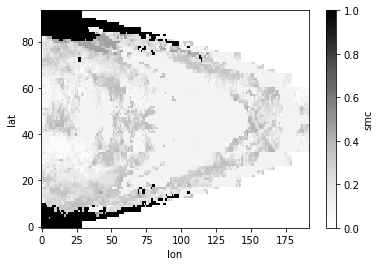

In [35]:
ds_surface_restart.smc.isel(lev=0).plot(cmap='Greys')

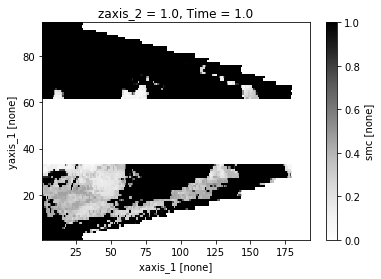

In [36]:
ds_sfc_ini_red.smc.isel(zaxis_2=0).plot(cmap='Greys')

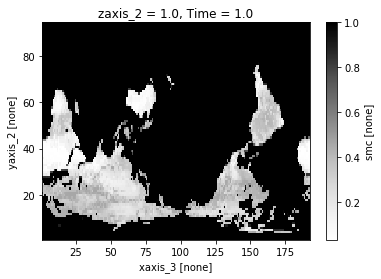

In [38]:
ds_sfc_ini.smc.isel(zaxis_2=0).plot(cmap='Greys')

# 5. stc - Soil temperature in K

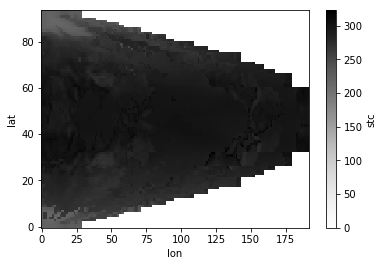

In [39]:
ds_surface_restart.stc.isel(lev=0).plot(cmap='Greys')

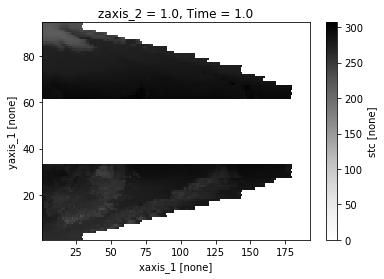

In [40]:
ds_sfc_ini_red.stc.isel(zaxis_2=0).plot(cmap='Greys')

Same problem

# 6. slc - liquid soil moisture content (fraction)

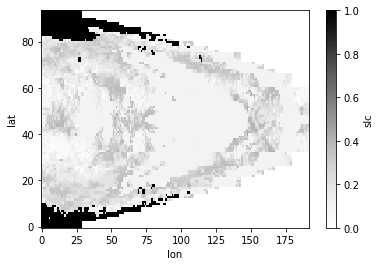

In [41]:
ds_surface_restart.slc.isel(lev=0).plot(cmap='Greys')

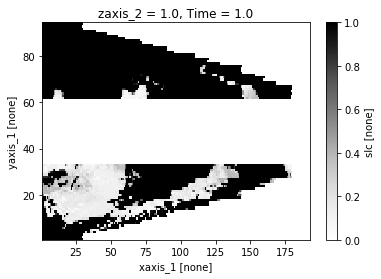

In [42]:
ds_sfc_ini_red.slc.isel(zaxis_2=0).plot(cmap='Greys')

# 7. Canopy - canopy water in m

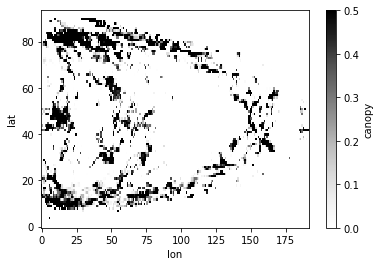

In [43]:
ds_surface_restart.canopy.plot(cmap='Greys')

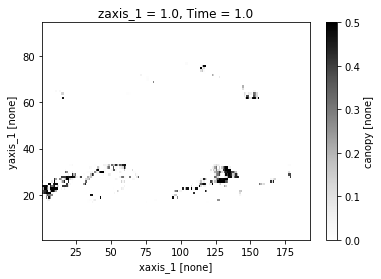

In [44]:
ds_sfc_ini_red.canopy.plot(cmap='Greys')

# 8. Trans - total plant transpiration

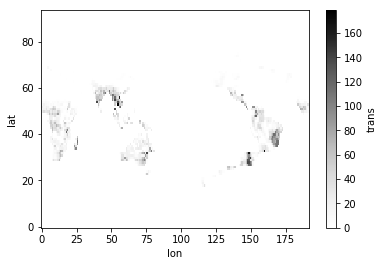

In [45]:
ds_surface_restart.trans.plot(cmap='Greys')

# 9. Sncovr - Snow cover over land

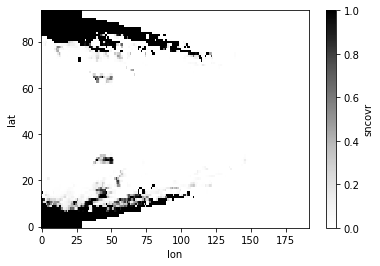

In [47]:
ds_surface_restart.sncovr.plot(cmap='Greys')

Download snow cover data from ERA5 as it is not in CFSR, and then multiply it with the lfrac to get 
snow cover over land